In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# K-Means

In [3]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [7]:
df = pd.read_excel('C:/Users/DELL/Desktop/Algorithm/K-Means.xlsx')

In [9]:
X = np.array(df)

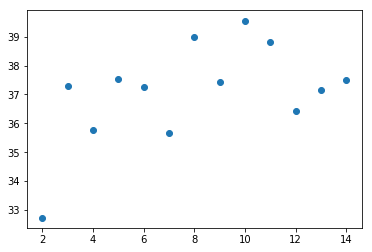

In [33]:
a = []
b = []
for i in range(2,15):
    y_pred = KMeans(n_clusters=i, random_state=9).fit_predict(X)
    score = metrics.calinski_harabaz_score(X, y_pred)
    a.append(i)
    b.append(score)
plt.scatter(a,b)

# Prophet

In [2]:
from fbprophet import Prophet

In [18]:
df = pd.read_excel('C:/Users/DELL/Desktop/Algorithm/Prophet.xlsx',encoding='UTF-8',header=0)

In [19]:
df.head()

,ds,y
0,2018-12-01,5385748.47
1,2018-12-02,5525380.45
2,2018-12-03,5696128.42
3,2018-12-04,5346394.73
4,2018-12-05,5719415.72


In [20]:
df.columns = ['ds','xh']

In [47]:
def ProphetTest(df,test=None):
    
    df['y'] = np.log(df['xh'])
    
    df_list = []
    
    m = Prophet(changepoint_prior_scale=0.01)
    m.fit(df[['ds','y']]);
    future = m.make_future_dataframe(periods=10)
    forecast = m.predict(future)
    forecast['expy'] = np.exp(forecast['yhat'])
    forecast['expylower'] = np.exp(forecast['yhat_lower'])
    forecast['expyupper'] = np.exp(forecast['yhat_upper'])
    
    m.plot(forecast)

    x1 = forecast['ds']
    y1 = forecast['yhat']

    plt.plot(x1,y1)
    plt.show()

    df_list.append(forecast[['ds', 'yhat','expy','expylower','expyupper']])  
        
    df_excel = pd.concat(df_list,axis=0)
    df_excel.to_excel('C:/Users/DELL/Desktop/predict_xh.xlsx')

    return forecast


INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
g:\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


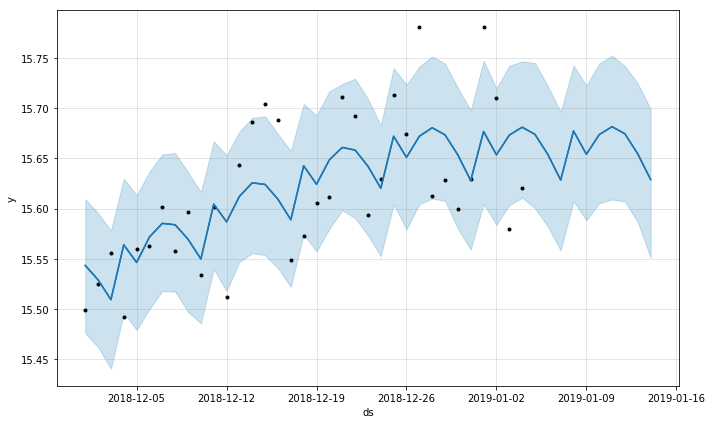

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,expy,expylower,expyupper
0,2018-12-01,15.532472,15.475776,15.609162,15.532472,15.532472,0.010877,0.010877,0.010877,0.010877,0.010877,0.010877,0.0,0.0,0.0,15.543350,5.628479e+06,5.260705e+06,6.011361e+06
1,2018-12-02,15.538254,15.461994,15.595661,15.538254,15.538254,-0.009221,-0.009221,-0.009221,-0.009221,-0.009221,-0.009221,0.0,0.0,0.0,15.529034,5.548475e+06,5.188703e+06,5.930751e+06
2,2018-12-03,15.544037,15.440533,15.577970,15.544037,15.544037,-0.034736,-0.034736,-0.034736,-0.034736,-0.034736,-0.034736,0.0,0.0,0.0,15.509301,5.440059e+06,5.078535e+06,5.826752e+06
3,2018-12-04,15.549819,15.495955,15.629719,15.549819,15.549819,0.014056,0.014056,0.014056,0.014056,0.014056,0.014056,0.0,0.0,0.0,15.563874,5.745194e+06,5.367939e+06,6.136217e+06
4,2018-12-05,15.555601,15.479105,15.613312,15.555601,15.555601,-0.009288,-0.009288,-0.009288,-0.009288,-0.009288,-0.009288,0.0,0.0,0.0,15.546312,5.645179e+06,5.278252e+06,6.036364e+06
5,2018-12-06,15.561383,15.500144,15.636721,15.561383,15.561383,0.010250,0.010250,0.010250,0.010250,0.010250,0.010250,0.0,0.0,0.0,15.571633,5.789942e+06,5.390473e+06,6.179331e+06
6,2018-12-07,15.567165,15.517859,15.653910,15.567165,15.567165,0.018062,0.018062,0.018062,0.018062,0.018062,0.018062,0.0,0.0,0.0,15.585226,5.869184e+06,5.486818e+06,6.286471e+06
7,2018-12-08,15.572947,15.517252,15.655259,15.572947,15.572947,0.010877,0.010877,0.010877,0.010877,0.010877,0.010877,0.0,0.0,0.0,15.583824,5.860960e+06,5.483489e+06,6.294955e+06
8,2018-12-09,15.578729,15.497062,15.636242,15.578729,15.578729,-0.009221,-0.009221,-0.009221,-0.009221,-0.009221,-0.009221,0.0,0.0,0.0,15.569508,5.777652e+06,5.373887e+06,6.176372e+06
9,2018-12-10,15.584511,15.485660,15.616456,15.584511,15.584511,-0.034736,-0.034736,-0.034736,-0.034736,-0.034736,-0.034736,0.0,0.0,0.0,15.549775,5.664758e+06,5.312960e+06,6.055372e+06


In [48]:
ProphetTest(df)